In [241]:
import os
import keras
import json
import glob
import sys
import pandas as pd
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
#from keras_applications.resnext import ResNeXt50
from keras.utils.data_utils import get_file
#import face_recognition
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import fnmatch
import re
import copy
import matplotlib.pyplot as plt
import scipy
import scipy.signal
# ! pip install mpu
import mpu
from script_onelist_colab import norm_int,repair,csv_exp,sel_exp,maxima,import_raw,read_processed,read_processed_sel,correct,onelist,interpolate_mat,interpolation_spectra

def touch(fname):
    if os.path.exists(fname):
        os.utime(fname, None)
    else:
        os.mkdir(fname)

# folder='/content/drive/MyDrive/PhD/CD_ML/CD_ML/alciML/csv/'
# if not os.path.abspath('')=='/content/drive/MyDrive/PhD/CD_ML/CD_ML/alciML/csv':
#   os.chdir(folder)
# print(os.path.abspath(''))  
# touch(folder+'png')

In [242]:
df3=pd.read_pickle('csv/PL_LT_sol_aug_pd.pkl')

In [243]:
#df3=pd.read_pickle('PL_LT_10augmented_pd.pkl')

In [244]:
len(df3.query('CD_amount==100 & typ.str.contains("LT405").values & file_name.str.contains("obs").values'))

#len(df3.query('file_name.str.contains("sim").values'))

32

In [245]:
df3.query('CD_amount==150 & typ.str.contains("LT405").values & file_name.str.contains("obs").values')

,alcohol_concentration,CD_amount,typ,file_name,spec
14,1.000000,150.0,LT405,obs2nm_CD032_0.5_150ul_3000ulethanol_0ulwater_...,"[[0, 78], [1, 78], [2, 73], [3, 66], [4, 64], ..."
24,0.833333,150.0,LT405,obs2nm_CD032_0.5_150ul_2500ulethanol_500ulwate...,"[[0, 68], [1, 68], [2, 70], [3, 52], [4, 65], ..."
25,0.966667,150.0,LT405,obs2nm_CD032_0.5_150ul_2900ulethanol_100ulwate...,"[[0, 65], [1, 65], [2, 73], [3, 73], [4, 68], ..."
27,0.733333,150.0,LT405,obs2nm_CD032_0.5_150ul_2200ulethanol_800ulwate...,"[[0, 54], [1, 54], [2, 52], [3, 58], [4, 51], ..."
47,0.866667,150.0,LT405,obs2nm_CD032_0.5_150ul_2600ulethanol_400ulwate...,"[[0, 62], [1, 62], [2, 64], [3, 55], [4, 62], ..."
71,0.766667,150.0,LT405,obs2nm_CD032_0.5_150ul_2300ulethanol_700ulwate...,"[[0, 63], [1, 63], [2, 68], [3, 59], [4, 52], ..."
84,0.000000,150.0,LT405,obs2nm_CD032_0.5_150ul_0ulethanol_3000ulwater_...,"[[0, 54], [1, 54], [2, 53], [3, 52], [4, 54], ..."
85,0.333333,150.0,LT405,obs2nm_CD032_0.5_150ul_1000ulethanol_2000ulwat...,"[[0, 49], [1, 49], [2, 48], [3, 64], [4, 49], ..."
125,0.533333,150.0,LT405,obs2nm_CD032_0.5_150ul_1600ulethanol_1400ulwat...,"[[0, 71], [1, 71], [2, 62], [3, 76], [4, 82], ..."
133,0.600000,150.0,LT405,obs2nm_CD032_0.5_150ul_1800ulethanol_1200ulwat...,"[[0, 62], [1, 62], [2, 63], [3, 56], [4, 63], ..."


In [246]:
df3

,alcohol_concentration,CD_amount,typ,file_name,spec
0,0.800000,300.0,PL,obs2nm_CD032_0.5_300ul_2400ulethanol_600ulwate...,"[[300, 0, 0, 7, 0, 3, 0, 0, 4, 1, 0, 11, 0, 6,..."
1,1.000000,100.0,LT405,obs2nm_CD032_0.5_100ul_3000ulethanol_0ulwater_...,"[[0, 78], [1, 78], [2, 60], [3, 68], [4, 80], ..."
2,0.466667,100.0,LT405,obs2nm_CD032_0.5_100ul_1400ulethanol_1600ulwat...,"[[0, 63], [1, 63], [2, 64], [3, 62], [4, 50], ..."
3,0.066667,150.0,LT450,obs2nm_CD032_0.5_150ul_200ulethanol_2800ulwate...,"[[0, 48], [1, 48], [2, 42], [3, 48], [4, 43], ..."
4,0.633333,100.0,LT450,obs2nm_CD032_0.5_100ul_1900ulethanol_1100ulwat...,"[[0, 94], [1, 94], [2, 87], [3, 90], [4, 91], ..."
...,...,...,...,...,...
2605,0.166667,150.0,PL,sim2nm_CD032_0.5_150ul_500ulethanol_2500ulwate...,"[[300, 14, 19, 0, 10, 8, 7, 18, 0, 0, 0, 6, 0,..."
2606,0.173333,150.0,PL,sim2nm_CD032_0.5_150ul_520ulethanol_2480ulwate...,"[[300, 15, 12, 0, 12, 9, 10, 9, 5, 2, 0, 9, 0,..."
2607,0.180000,150.0,PL,sim2nm_CD032_0.5_150ul_540ulethanol_2460ulwate...,"[[300, 8, 8, 0, 4, 8, 5, 8, 0, 0, 0, 2, 0, 26,..."
2608,0.186667,150.0,PL,sim2nm_CD032_0.5_150ul_560ulethanol_2440ulwate...,"[[300, 8, 8, 0, 6, 3, 6, 1, 1, 0, 0, 0, 0, 23,..."


In [247]:
PL100obs=df3.query('CD_amount==100 & typ.str.contains("PL").values & file_name.str.contains("obs").values')
PL100obs=PL100obs.sample(frac=1)

In [248]:
PLobs=df3.query('typ.str.contains("PL").values & file_name.str.contains("obs").values')
LT405obs=df3.query('typ.str.contains("LT405").values & file_name.str.contains("obs").values')
LT450obs=df3.query('typ.str.contains("LT450").values & file_name.str.contains("obs").values')

In [249]:
print(len(PLobs))
print(len(LT405obs))
print(len(LT450obs))

91
73
79


In [250]:
onemat=pd.read_pickle('PL_LT_augmented_onemat_pd2.pkl')
beverages=pd.read_pickle('PL_LT_beverage_onemat_pd_2.pkl')
beverages=beverages.sample(frac=1)
beverages['alcohol_concentration']=beverages['alcohol_concentration']/100

In [251]:
onemat

,alcohol_concentration,blank_LT405spec,blank_LT450spec,blank_PLspec,300_LT405spec,300_LT450spec,300_PLspec,100_LT405spec,100_LT450spec,100_PLspec,150_LT405spec,150_LT450spec,150_PLspec
0,0.800000,"[[0.0, 63.0], [1.0, 65.0], [2.0, 55.0], [3.0, ...","[[0.0, 32.0], [1.0, 31.0], [2.0, 42.0], [3.0, ...","[[300.0, 2024.0, 2011.0, 2111.0, 2289.0, 2626....","[[0, 58], [1, 58], [2, 63], [3, 68], [4, 62], ...","[[0, 55], [1, 55], [2, 61], [3, 74], [4, 66], ...","[[300, 0, 0, 7, 0, 3, 0, 0, 4, 1, 0, 11, 0, 6,...","[[0, 74], [1, 74], [2, 65], [3, 57], [4, 58], ...","[[0, 63], [1, 63], [2, 68], [3, 74], [4, 64], ...","[[300, 0, 4, 6, 5, 0, 14, 0, 10, 2, 16, 2, 0, ...","[[0, 64], [1, 64], [2, 64], [3, 53], [4, 54], ...","[[0, 62], [1, 62], [2, 43], [3, 69], [4, 66], ...","[[300, 4, 0, 0, 14, 7, 7, 13, 10, 3, 8, 12, 16..."
1,0.800000,"[[0.0, 63.0], [1.0, 64.0], [2.0, 59.0], [3.0, ...","[[0.0, 30.0], [1.0, 31.0], [2.0, 44.0], [3.0, ...","[[300.0, 2040.0, 1995.0, 2123.0, 2286.0, 2606....","[[0, 43], [1, 84], [2, 36], [3, 109], [4, 59],...","[[0, 24], [1, 55], [2, 29], [3, 90], [4, 117],...","[[300, 0, 0, 0, 1, 2, 10, 6, 3, 0, 8, 4, 4, 0,...","[[0, 99], [1, 99], [2, 111], [3, 99], [4, 98],...","[[0, 88], [1, 88], [2, 99], [3, 99], [4, 92], ...","[[300, 1, 0, 0, 4, 9, 0, 5, 20, 21, 14, 24, 23...","[[0, 88], [1, 23], [2, 70], [3, 90], [4, 59], ...","[[0, 35], [1, 13], [2, 13], [3, 80], [4, 55], ...","[[300, 8, 0, 0, 2, 0, 1, 5, 5, 1, 1, 1, 4, 0, ..."
2,0.800000,"[[0.0, 62.0], [1.0, 62.0], [2.0, 56.0], [3.0, ...","[[0.0, 29.0], [1.0, 32.0], [2.0, 42.0], [3.0, ...","[[300.0, 2034.0, 2015.0, 2119.0, 2281.0, 2605....","[[0, 42], [1, 82], [2, 35], [3, 108], [4, 57],...","[[0, 23], [1, 55], [2, 27], [3, 90], [4, 116],...","[[300, 0, 0, 12342, 0, 0, 1, 0, 0, 0, 1, 0, 0,...","[[0, 61], [1, 75], [2, 70], [3, 104], [4, 10],...","[[0, 52], [1, 52], [2, 58], [3, 63], [4, 47], ...","[[300, 2, 0, 0, 7, 15, 6, 18, 14, 9, 11, 20, 1...","[[0, 86], [1, 21], [2, 70], [3, 91], [4, 58], ...","[[0, 63], [1, 61], [2, 44], [3, 67], [4, 64], ...","[[300, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, ..."
3,0.800000,"[[0.0, 63.0], [1.0, 62.0], [2.0, 59.0], [3.0, ...","[[0.0, 30.0], [1.0, 30.0], [2.0, 41.0], [3.0, ...","[[300.0, 2045.0, 2005.0, 2094.0, 2254.0, 2611....","[[0, 43], [1, 82], [2, 34], [3, 110], [4, 59],...","[[0, 54], [1, 52], [2, 60], [3, 72], [4, 64], ...","[[300, 0, 12380, 12408, 0, 0, 1, 0, 0, 0, 0, 0...","[[0, 74], [1, 73], [2, 62], [3, 57], [4, 58], ...","[[0, 104], [1, 26], [2, 57], [3, 102], [4, 85]...","[[300, 0, 0, 0, 0, 4, 0, 0, 2, 10, 6, 4, 7, 18...","[[0, 87], [1, 21], [2, 68], [3, 88], [4, 56], ...","[[0, 61], [1, 60], [2, 41], [3, 69], [4, 64], ...","[[300, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ..."
4,0.800000,"[[0.0, 65.0], [1.0, 66.0], [2.0, 59.0], [3.0, ...","[[0.0, 31.0], [1.0, 31.0], [2.0, 44.0], [3.0, ...","[[300.0, 2044.0, 2014.0, 2114.0, 2290.0, 2619....","[[0, 59], [1, 57], [2, 63], [3, 67], [4, 62], ...","[[0, 55], [1, 56], [2, 61], [3, 72], [4, 68], ...","[[300, 0, 0, 0, 0, 0, 1, 1, 0, 12360, 1, 0, 0,...","[[0, 99], [1, 100], [2, 107], [3, 98], [4, 99]...","[[0, 22], [1, 47], [2, 75], [3, 75], [4, 67], ...","[[300, 5, 0, 0, 4, 4, 0, 8, 0, 6, 4, 4, 2, 15,...","[[0, 63], [1, 64], [2, 63], [3, 52], [4, 54], ...","[[0, 63], [1, 61], [2, 43], [3, 69], [4, 66], ...","[[300, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,0.320000,"[[0.0, 63.0], [1.0, 64.0], [2.0, 58.0], [3.0, ...","[[0.0, 33.0], [1.0, 30.0], [2.0, 42.0], [3.0, ...","[[300.0, 2040.0, 1990.0, 2134.0, 2285.0, 2635....","[[0, 76], [1, 49], [2, 68], [3, 48], [4, 54], ...","[[0, 91], [1, 39], [2, 39], [3, 112], [4, 0], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0,...","[[0, 128], [1, 108], [2, 94], [3, 107], [4, 90...","[[0, 68], [1, 121], [2, 121], [3, 96], [4, 81]...","[[300, 8, 4, 0, 11, 2, 9, 6, 12, 3, 5, 6, 0, 8...","[[0, 64], [1, 42], [2, 0], [3, 99], [4, 50], [...","[[0, 107], [1, 33], [2, 73], [3, 29], [4, 31],..."

In [252]:
def dropzero(df,colu):
  listl=[]
  for i in range(len(df[colu])):
    if np.shape(df[colu].iloc[i]) != (16, 217):
      listl.append(df.index.values[i])
  for k in listl:
    print(listl)
    df=df.drop(k)
  return df

def XY_creation(source,colu):
  X = np.zeros(shape=(len(source[colu]),16,217))
  for i in range(len(source[colu])):
    X[i] = source[colu].iloc[i]/65535
  print(X.dtype)

  #Alcohol
  ac = source['alcohol_concentration']
  ac=ac.astype(float)*100
  ac= np.array(ac)
  labels_f =[]
  i=0
  while i <len(ac):
    label=[]
    label.append([ac[i]])
    labels_f.append(label)
    i+=1
  labels_f =np.array(labels_f)
  labels_f.shape
  return X,labels_f

In [253]:
def maxi(x):
  if np.nanmax(x)>=0:
    return np.nanmax(x)
  else:
    return 65536+np.nanmax(x)

In [254]:
PL100obs=PL100obs.sample(frac=1)
PL100obs=PL100obs=dropzero(PL100obs,"spec")

[141]


In [255]:
np.max(np.argmax(PL100obs['spec'].iloc[1][:,1:],axis=1))
np.amax(PL100obs['spec'].iloc[1])
np.where(PL100obs['spec'].iloc[1] == np.amax(PL100obs['spec'].iloc[1]))[1][0]
# indices = np.where(a==a.max())

121

In [256]:
PL100obs['max_ind']=PL100obs.apply(lambda x: (552+(np.where(x['spec'] == np.amax(x['spec']))[1][0]-117)*2), axis=1)

In [257]:
PL100obs['max']=PL100obs.apply(lambda x: maxi(x['spec']),axis=1)
PL100obs['max']=PL100obs['max'].apply(lambda x: 65536+x if x<0 else x)

In [258]:
onemat_feature=pd.DataFrame()
# onemat_feature['100_max']=onemat.apply(lambda x: np.nanmax(x['100_PLspec']), axis=1)


In [259]:
onemat_feature['alcohol_concentration']=copy.deepcopy(onemat['alcohol_concentration'])

In [260]:
def monoExp(x, m, t, b):
    return m * np.exp(-x/t) + b

In [261]:
def monoexp_dec(value):
  argmax=np.argmax(value[:,1])
  xv=np.asarray((value[argmax:,0]-value[argmax-1,0])/1023*200, dtype=np.longdouble)
  yv=np.asarray(value[argmax:,1]/65535, dtype=np.longdouble)
  p0=(1,3,0.002)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0)
  m, t, b = params
  plt.plot(xv,yv) 
  plt.plot(xv, monoExp(xv, m, t, b), '--', label="fitted") 
  plt.xlim(0,20)
  print(t)
  return t



In [281]:
def monoexp_dec_df(value,x,col):
  print(x.name, col)
  argmax=np.argmax(value[:,1])
  for n in range(1,4):
    if value[-n,1] >0.9*argmax:
      value[-n,1]=value[-(n+1),1]
  xv=np.asarray((value[argmax:,0]-value[argmax-1,0])/1023*200, dtype=np.longdouble)
  yv=np.asarray(value[argmax:,1]/65535, dtype=np.longdouble)
  p0=(1.01,3,0.002)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0,maxfev=100000)
  m, t, b = params
  print(t)
  return t

In [287]:
onemat['150_LT405spec'][280][-3,1]

90

In [270]:
onemat

,alcohol_concentration,blank_LT405spec,blank_LT450spec,blank_PLspec,300_LT405spec,300_LT450spec,300_PLspec,100_LT405spec,100_LT450spec,100_PLspec,150_LT405spec,150_LT450spec,150_PLspec
0,0.800000,"[[0.0, 63.0], [1.0, 65.0], [2.0, 55.0], [3.0, ...","[[0.0, 32.0], [1.0, 31.0], [2.0, 42.0], [3.0, ...","[[300.0, 2024.0, 2011.0, 2111.0, 2289.0, 2626....","[[0, 58], [1, 58], [2, 63], [3, 68], [4, 62], ...","[[0, 55], [1, 55], [2, 61], [3, 74], [4, 66], ...","[[300, 0, 0, 7, 0, 3, 0, 0, 4, 1, 0, 11, 0, 6,...","[[0, 74], [1, 74], [2, 65], [3, 57], [4, 58], ...","[[0, 63], [1, 63], [2, 68], [3, 74], [4, 64], ...","[[300, 0, 4, 6, 5, 0, 14, 0, 10, 2, 16, 2, 0, ...","[[0, 64], [1, 64], [2, 64], [3, 53], [4, 54], ...","[[0, 62], [1, 62], [2, 43], [3, 69], [4, 66], ...","[[300, 4, 0, 0, 14, 7, 7, 13, 10, 3, 8, 12, 16..."
1,0.800000,"[[0.0, 63.0], [1.0, 64.0], [2.0, 59.0], [3.0, ...","[[0.0, 30.0], [1.0, 31.0], [2.0, 44.0], [3.0, ...","[[300.0, 2040.0, 1995.0, 2123.0, 2286.0, 2606....","[[0, 43], [1, 84], [2, 36], [3, 109], [4, 59],...","[[0, 24], [1, 55], [2, 29], [3, 90], [4, 117],...","[[300, 0, 0, 0, 1, 2, 10, 6, 3, 0, 8, 4, 4, 0,...","[[0, 99], [1, 99], [2, 111], [3, 99], [4, 98],...","[[0, 88], [1, 88], [2, 99], [3, 99], [4, 92], ...","[[300, 1, 0, 0, 4, 9, 0, 5, 20, 21, 14, 24, 23...","[[0, 88], [1, 23], [2, 70], [3, 90], [4, 59], ...","[[0, 35], [1, 13], [2, 13], [3, 80], [4, 55], ...","[[300, 8, 0, 0, 2, 0, 1, 5, 5, 1, 1, 1, 4, 0, ..."
2,0.800000,"[[0.0, 62.0], [1.0, 62.0], [2.0, 56.0], [3.0, ...","[[0.0, 29.0], [1.0, 32.0], [2.0, 42.0], [3.0, ...","[[300.0, 2034.0, 2015.0, 2119.0, 2281.0, 2605....","[[0, 42], [1, 82], [2, 35], [3, 108], [4, 57],...","[[0, 23], [1, 55], [2, 27], [3, 90], [4, 116],...","[[300, 0, 0, 12342, 0, 0, 1, 0, 0, 0, 1, 0, 0,...","[[0, 61], [1, 75], [2, 70], [3, 104], [4, 10],...","[[0, 52], [1, 52], [2, 58], [3, 63], [4, 47], ...","[[300, 2, 0, 0, 7, 15, 6, 18, 14, 9, 11, 20, 1...","[[0, 86], [1, 21], [2, 70], [3, 91], [4, 58], ...","[[0, 63], [1, 61], [2, 44], [3, 67], [4, 64], ...","[[300, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, ..."
3,0.800000,"[[0.0, 63.0], [1.0, 62.0], [2.0, 59.0], [3.0, ...","[[0.0, 30.0], [1.0, 30.0], [2.0, 41.0], [3.0, ...","[[300.0, 2045.0, 2005.0, 2094.0, 2254.0, 2611....","[[0, 43], [1, 82], [2, 34], [3, 110], [4, 59],...","[[0, 54], [1, 52], [2, 60], [3, 72], [4, 64], ...","[[300, 0, 12380, 12408, 0, 0, 1, 0, 0, 0, 0, 0...","[[0, 74], [1, 73], [2, 62], [3, 57], [4, 58], ...","[[0, 104], [1, 26], [2, 57], [3, 102], [4, 85]...","[[300, 0, 0, 0, 0, 4, 0, 0, 2, 10, 6, 4, 7, 18...","[[0, 87], [1, 21], [2, 68], [3, 88], [4, 56], ...","[[0, 61], [1, 60], [2, 41], [3, 69], [4, 64], ...","[[300, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ..."
4,0.800000,"[[0.0, 65.0], [1.0, 66.0], [2.0, 59.0], [3.0, ...","[[0.0, 31.0], [1.0, 31.0], [2.0, 44.0], [3.0, ...","[[300.0, 2044.0, 2014.0, 2114.0, 2290.0, 2619....","[[0, 59], [1, 57], [2, 63], [3, 67], [4, 62], ...","[[0, 55], [1, 56], [2, 61], [3, 72], [4, 68], ...","[[300, 0, 0, 0, 0, 0, 1, 1, 0, 12360, 1, 0, 0,...","[[0, 99], [1, 100], [2, 107], [3, 98], [4, 99]...","[[0, 22], [1, 47], [2, 75], [3, 75], [4, 67], ...","[[300, 5, 0, 0, 4, 4, 0, 8, 0, 6, 4, 4, 2, 15,...","[[0, 63], [1, 64], [2, 63], [3, 52], [4, 54], ...","[[0, 63], [1, 61], [2, 43], [3, 69], [4, 66], ...","[[300, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,0.320000,"[[0.0, 63.0], [1.0, 64.0], [2.0, 58.0], [3.0, ...","[[0.0, 33.0], [1.0, 30.0], [2.0, 42.0], [3.0, ...","[[300.0, 2040.0, 1990.0, 2134.0, 2285.0, 2635....","[[0, 76], [1, 49], [2, 68], [3, 48], [4, 54], ...","[[0, 91], [1, 39], [2, 39], [3, 112], [4, 0], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0,...","[[0, 128], [1, 108], [2, 94], [3, 107], [4, 90...","[[0, 68], [1, 121], [2, 121], [3, 96], [4, 81]...","[[300, 8, 4, 0, 11, 2, 9, 6, 12, 3, 5, 6, 0, 8...","[[0, 64], [1, 42], [2, 0], [3, 99], [4, 50], [...","[[0, 107], [1, 33], [2, 73], [3, 29], [4, 31],..."

In [288]:
for col in onemat.columns:
    print(col)
    if "PL" in col:
        label_feature=col.split('_')[0]
        onemat_feature[label_feature+'_max']=onemat.apply(lambda x: np.nanmax(x[col]), axis=1)
        onemat_feature[label_feature+'_max']=onemat_feature[label_feature+'_max'].apply(lambda x: 65536+x if x<0 else x)
        onemat_feature[label_feature+'_max_ind']=onemat.apply(lambda x: (552+(np.where(x[col] == np.amax(x[col]))[1][0]-117)*2), axis=1)
    if "LT405" in col:
        label_feature=col.split('_')[0]
        onemat_feature[label_feature+'_LT405']=onemat.apply(lambda x: monoexp_dec_df(x[col],x,col), axis=1)
    if "LT450" in col:
        label_feature=col.split('_')[0]
        onemat_feature[label_feature+'_LT450']=onemat.apply(lambda x: monoexp_dec_df(x[col],x,col), axis=1)
        


alcohol_concentration
blank_LT405spec
0 blank_LT405spec
0.831817182962669
1 blank_LT405spec
0.8356100146427499
2 blank_LT405spec
0.8323007235607766
3 blank_LT405spec
0.8315122780801083
4 blank_LT405spec
0.8384649408560706
5 blank_LT405spec
0.8357967262673479
6 blank_LT405spec
0.8334207802284705
7 blank_LT405spec
0.8294884383501415
8 blank_LT405spec
0.8320755119417033
9 blank_LT405spec
0.8373793396593552
10 blank_LT405spec
0.8371624171918195
11 blank_LT405spec
0.8307639422330914
12 blank_LT405spec
0.8350157033637251
13 blank_LT405spec
0.8334147874147585
14 blank_LT405spec
0.8370258031693262
15 blank_LT405spec
0.8309179773805004
16 blank_LT405spec
0.8326294190990375
17 blank_LT405spec
0.8290109368031687
18 blank_LT405spec
0.8319104831499
19 blank_LT405spec
0.8329291355057833
20 blank_LT405spec
0.832099037090984
21 blank_LT405spec
0.8327816816488708
22 blank_LT405spec
0.8350920964974523
23 blank_LT405spec
0.8335745374026324
24 blank_LT405spec
0.8333883488670776
25 blank_LT405spec
0.832848

/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_89315/2796851273.py:2: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-x/t) + b


0.013888023503236731
123 300_LT405spec
3.7014097335698075
124 300_LT405spec
3.6201756275710784
125 300_LT405spec
3.64679471914123
126 300_LT405spec
3.630197947110429
127 300_LT405spec
3.6912847321653635
128 300_LT405spec
4.350818574217396
129 300_LT405spec
3.5823245478950394
130 300_LT405spec
3.6614339549811423
131 300_LT405spec
0.022757787666466755
132 300_LT405spec
3.646575787629046
133 300_LT405spec
3.6960397410185997
134 300_LT405spec
3.6102302381960225
135 300_LT405spec
3.7094579911552668
136 300_LT405spec
3.7023333515011383
137 300_LT405spec
3.654338957928586
138 300_LT405spec
3.6529258176057615
139 300_LT405spec
3.644562530072441
140 300_LT405spec
3.6103738548986413
141 300_LT405spec
3.610031785286112
142 300_LT405spec
3.6435445495505125
143 300_LT405spec
3.68233738431114
144 300_LT405spec
3.60943927758947
145 300_LT405spec
3.635156704555024
146 300_LT405spec
4.238988445087396
147 300_LT405spec
3.689861544012501
148 300_LT405spec
3.5769843558418373
149 300_LT405spec
3.6221676653

/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_89315/2796851273.py:2: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(-x/t) + b


0.022741677178107583
526 150_LT405spec
2.210807653358893
527 150_LT405spec
0.02403217337107668
528 150_LT405spec
0.02448853742630381
529 150_LT405spec
0.021392240441911438
530 150_LT405spec
0.022163326314495174
531 150_LT405spec
2.6269859883018367
532 150_LT405spec
0.024578830326691642
533 150_LT405spec
2.6408068551464776
534 150_LT405spec
0.02411619281715688
535 150_LT405spec
2.653871355330094
536 150_LT405spec
0.01971475770702193
537 150_LT405spec
2.6647196486782274
538 150_LT405spec
0.02417549492423265
539 150_LT405spec
2.691652902703707
540 150_LT405spec
0.02213527540442947
541 150_LT405spec
2.704807519463641
542 150_LT405spec
0.025294502577651177
543 150_LT405spec
2.7179981928340076
544 150_LT405spec
2.740640519535602
545 150_LT405spec
2.7305791128081007
546 150_LT405spec
0.023441547432260887
547 150_LT405spec
2.7705971002536702
548 150_LT405spec
0.022939964812006462
549 150_LT405spec
-39038.64707958883
550 150_LT405spec
0.02381958999263808
551 150_LT405spec
2.7987446339219906
552

In [289]:
bev_feature=pd.DataFrame()
bev_feature['alcohol_concentration']=copy.deepcopy(beverages['alcohol_concentration'])
bev_feature['beverage']=copy.deepcopy(beverages['beverage'])

In [290]:
for col in beverages.columns:
    print(col)
    if "PL" in col:
        label_feature=col.split('_')[0]
        bev_feature[label_feature+'_max']=beverages.apply(lambda x: np.nanmax(x[col]), axis=1)
        bev_feature[label_feature+'_max']=bev_feature[label_feature+'_max'].apply(lambda x: 65536+x if x<0 else x)
        bev_feature[label_feature+'_max_ind']=beverages.apply(lambda x: (552+(np.where(x[col] == np.amax(x[col]))[1][0]-117)*2), axis=1)
    if "LT405" in col:
        label_feature=col.split('_')[0]
        bev_feature[label_feature+'_LT405']=beverages.apply(lambda x: monoexp_dec_df(x[col],x,col), axis=1)
    if "LT450" in col:
        label_feature=col.split('_')[0]
        bev_feature[label_feature+'_LT450']=beverages.apply(lambda x: monoexp_dec_df(x[col],x,col), axis=1)

beverage
alcohol_concentration
blank_LT405spec
17 blank_LT405spec
3.532179521351105
18 blank_LT405spec
3.5876316176957315
0 blank_LT405spec
1.5155554604558197
13 blank_LT405spec
3.7323701118004595
3 blank_LT405spec
3.3898024429096236
15 blank_LT405spec
3.044882975382223
4 blank_LT405spec
3.848560769109628
6 blank_LT405spec
4.642027256905365
7 blank_LT405spec
3.5556586805693255
9 blank_LT405spec
3.3461783502616065
16 blank_LT405spec
3.646222716077699
10 blank_LT405spec
3.0801963569020687
5 blank_LT405spec
4.639566335614296
14 blank_LT405spec
5.304334005174194
2 blank_LT405spec
3.351552616681768
11 blank_LT405spec
3.08874434963144
8 blank_LT405spec
3.3819197965456915
12 blank_LT405spec
3.7323701118004595
1 blank_LT405spec
3.3782725916866254
blank_LT450spec
17 blank_LT450spec
2.943479061519068
18 blank_LT450spec
2.9464732469656516
0 blank_LT450spec
1.3749425322191349
13 blank_LT450spec
3.635109113707736
3 blank_LT450spec
3.3487916551455745
15 blank_LT450spec
3.003461269241177
4 blank_LT45

In [291]:
bev_feature

,alcohol_concentration,beverage,blank_LT405,blank_LT450,blank_max,blank_max_ind,300_LT405,300_LT450,300_max,300_max_ind,150_LT405,150_LT450,150_max,150_max_ind,100_LT405,100_LT450,100_max,100_max_ind
17,0.130,whitewine2,3.532180,2.943479,48487,458,2.178319,2.178868,1634,654,2.231450,2.231802,3519,648,2.290670,2.176877,4413,648
18,0.130,whitewine2,3.587632,2.946473,48487,526,2.759698,2.128204,1634,538,2.331251,2.229169,3519,670,2.293725,2.185335,4413,380
0,0.300,limoncello,1.515555,1.374943,17779,460,3.083158,3.067569,10843,576,3.111279,3.097757,20355,568,3.091673,3.015152,23628,566
13,0.048,bitburgerpils,3.732370,3.635109,57603,506,2.290142,2.300124,1072,374,2.833692,2.291594,3299,508,2.658234,4.930714,4947,578
3,0.520,luzhoulaojiao,3.389802,3.348792,3541,532,3.393028,3.302098,2799,582,3.352758,3.398419,7040,432,4.095225,4.022298,15157,424
15,0.090,chimay,3.044883,3.003461,8066,558,2.323919,2.310715,600,318,2.325722,2.323903,1047,646,2.361804,2.353916,1117,650
4,0.000,bitburgerdrive,3.848561,3.642793,57603,506,2.183125,2.111902,903,584,2.908445,2.153425,2185,586,3.045318,2.177615,5233,576
6,0.000,bitburgerdrive,4.642027,3.693365,57603,418,2.114241,2.207560,903,544,2.137742,2.088704,2185,392,3.084758,2.182342,2747,520
7,0.050,chang,3.555659,3.402596,46414,502,2.150007,2.140823,600,318,2.046944,2.219631,1387,584,1.963795,2.224742,3417,582
9,0.400,absolut,3.346178,3.359187,55290,514,3.119599,3.742426,13046,470,3.385128,3.333791,22807,364,3.353862,3.335700,34399,720


In [ ]:
# bev_feature.to_pickle('PL_LT_beverage_onemat_pd_features.pkl')
# onemat_feature.to_pickle('PL_LT_augmented_onemat_pd_features.pkl')

In [292]:
PL100obs

,alcohol_concentration,CD_amount,typ,file_name,spec,max_ind,max
202,0.400000,100.0,PL,obs2nm_CD032_0.5_100ul_1200ulethanol_1800ulwat...,"[[300, 5, 0, 0, 10, 0, 4, 26, 23, 17, 0, 6, 9,...",564,35961
94,0.633333,100.0,PL,obs2nm_CD032_0.5_100ul_1900ulethanol_1100ulwat...,"[[300, 0, 0, 0, 11, 0, 8, 4, 2, 2, 10, 10, 7, ...",560,29520
99,0.766667,100.0,PL,obs2nm_CD032_0.5_100ul_2300ulethanol_700ulwate...,"[[300, 2, 0, 0, 0, 11, 0, 0, 5, 12, 10, 8, 5, ...",558,52692
221,0.000000,100.0,PL,obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwater_...,"[[300, 9, 13, 14, 19, 9, 1, 15, 12, 0, 12, 8, ...",582,22861
217,0.200000,100.0,PL,obs2nm_CD032_0.5_100ul_600ulethanol_2400ulwate...,"[[300, 9, 1, 10, 12, 25, 4, 11, 20, 21, 17, 21...",570,23401
231,0.000000,100.0,PL,obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwater_...,"[[300, 8, 2, 10, 10, 10, 10, 10, 10, 7, 16, 1,...",578,18221
114,0.766667,100.0,PL,obs2nm_CD032_0.5_100ul_2300ulethanol_700ulwate...,"[[300, 14, 0, 1, 4, 19, 15, 5, 0, 22, 7, 42, 2...",556,45130
205,0.600000,100.0,PL,obs2nm_CD032_0.5_100ul_1800ulethanol_1200ulwat...,"[[300, 8, 19, 12, 7, 6, 15, 10, 18, 30, 4, 26,...",560,35274
109,0.566667,100.0,PL,obs2nm_CD032_0.5_100ul_1700ulethanol_1300ulwat...,"[[300, 6, 0, 0, 10, 0, 0, 4, 7, 0, 0, 9, 5, 12...",560,31422
207,0.866667,100.0,PL,obs2nm_CD032_0.5_100ul_2600ulethanol_400ulwate...,"[[300, 12, 0, 11, 4, 9, 7, 8, 16, 13, 24, 10, ...",556,47353


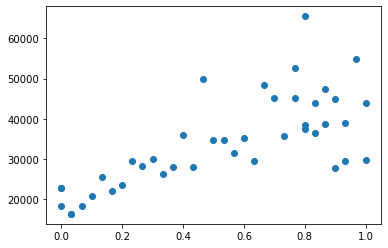

In [293]:
PL100obs.sort_values('alcohol_concentration')
plt.scatter(PL100obs['alcohol_concentration'],PL100obs['max'])

Text(0.5, 1.0, 'Carbon Dots Solvent Dependence')

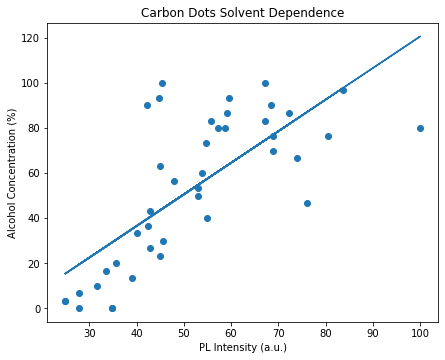

In [294]:
# plt.scatter(PL100obs['alcohol_concentration'],PL100obs['max_ind'])
m1, b1 = np.polyfit(PL100obs['max']/max(PL100obs['max'])*100,PL100obs['alcohol_concentration']*100,1)
plt.figure(figsize=(7,5.5))
plt.tight_layout()
plt.scatter(PL100obs['max']/max(PL100obs['max'])*100,PL100obs['alcohol_concentration']*100)
plt.plot(PL100obs['max']/max(PL100obs['max'])*100, m1*PL100obs['max']/max(PL100obs['max'])*100 + b1)
np.average(np.abs(np.abs(m1*PL100obs['max']/max(PL100obs['max'])*100 + b1)-np.abs(PL100obs['alcohol_concentration']*100)))
#plt.xticks(np.arange(550,590,5))
plt.xlabel('PL Intensity (a.u.)')
plt.ylabel('Alcohol Concentration (%)')
plt.title('Carbon Dots Solvent Dependence')
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
#plt.savefig("PL_int_dependence_fit.png",dpi=300,facecolor='w')

In [295]:
sm.r2_score(PL100obs['alcohol_concentration']*100,m1*PL100obs['max']/max(PL100obs['max'])*100 + b1)

0.5334264148884387

7.669511353498588


Text(0.5, 1.0, 'PL Linear Fit Accuracy')

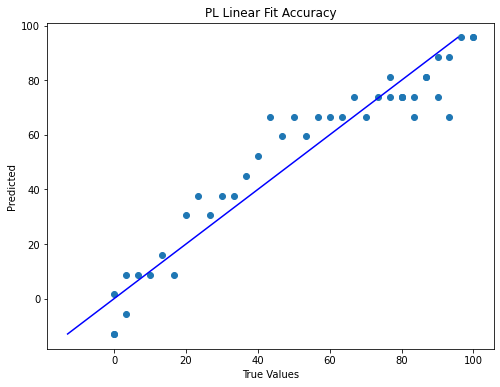

In [39]:
# plt.scatter(PL100obs['alcohol_concentration'],PL100obs['max_ind'])
m, b = np.polyfit(PL100obs['max_ind'],PL100obs['alcohol_concentration']*100,1)
plt.figure(figsize=(8,6))
plt.scatter(PL100obs['alcohol_concentration']*100,m*PL100obs['max_ind'] + b)
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1 = max(max(m*PL100obs['max_ind'] + b), max(PL100obs['alcohol_concentration']))
p2 = min(min(m*PL100obs['max_ind'] + b), min(PL100obs['alcohol_concentration']))
plt.plot([p1, p2], [p1, p2], 'b-')
print(np.average(np.abs(np.abs(m*PL100obs['max_ind'] + b)-np.abs(PL100obs['alcohol_concentration']*100))))
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('PL Linear Fit Accuracy')
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
# plt.savefig("PL_linear_fit?_accuracy.png")

In [45]:
sm.r2_score(PL100obs['alcohol_concentration']*100,m*PL100obs['max_ind'] + b)

0.9115492853623196

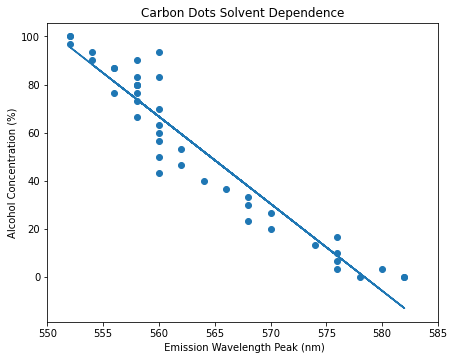

In [53]:
# plt.scatter(PL100obs['alcohol_concentration'],PL100obs['max_ind'])
m, b = np.polyfit(PL100obs['max_ind'],PL100obs['alcohol_concentration']*100,1)
plt.figure(figsize=(7,5.5))
plt.tight_layout()
plt.scatter(PL100obs['max_ind'],PL100obs['alcohol_concentration']*100)
plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
np.average(np.abs(np.abs(m*PL100obs['max_ind'] + b)-np.abs(PL100obs['alcohol_concentration']*100)))
plt.xticks(np.arange(550,590,5))
plt.xlabel(' Emission Wavelength Peak (nm)')
plt.ylabel('Alcohol Concentration (%)')
plt.title('Carbon Dots Solvent Dependence')
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
plt.savefig("PL_dependence_fit.png",dpi=300,facecolor='w')

In [55]:
LTobs=df3.query('CD_amount==100 & file_name.str.contains("obs").values & typ.str.contains("LT450").values').append(df3.query('CD_amount==100 & file_name.str.contains("obs").values & typ.str.contains("LT405").values'))
LTobs=LTobs.sample(frac=1)

In [56]:
LTobs.sort_values('alcohol_concentration')

,alcohol_concentration,CD_amount,typ,file_name,spec
2328,0.000000,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwa...,"[[0.0, 40.0], [1.0, 40.0], [2.0, 47.0], [3.0, ..."
2432,0.000000,100.0,LT405,sel_obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwa...,"[[0.0, 36.0], [1.0, 36.0], [2.0, 45.0], [3.0, ..."
2357,0.033333,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_100ulethanol_2900ul...,"[[0.0, 62.0], [1.0, 62.0], [2.0, 73.0], [3.0, ..."
2470,0.033333,100.0,LT405,sel_obs2nm_CD032_0.5_100ul_100ulethanol_2900ul...,"[[0.0, 104.0], [1.0, 104.0], [2.0, 117.0], [3...."
2446,0.066667,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_200ulethanol_2800ul...,"[[0.0, 71.0], [1.0, 71.0], [2.0, 68.0], [3.0, ..."
...,...,...,...,...,...
2419,0.900000,100.0,LT405,sel_obs2nm_CD032_0.5_100ul_2700ulethanol_300ul...,"[[0.0, 62.0], [1.0, 62.0], [2.0, 73.0], [3.0, ..."
2348,0.933333,100.0,LT405,sel_obs2nm_CD032_0.5_100ul_2800ulethanol_200ul...,"[[0.0, 59.0], [1.0, 59.0], [2.0, 66.0], [3.0, ..."
2452,0.933333,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_2800ulethanol_200ul...,"[[0.0, 52.0], [1.0, 52.0], [2.0, 68.0], [3.0, ..."
2381,1.000000,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_3000ulethanol_0ulwa...,"[[0.0, 62.0], [1.0, 62.0], [2.0, 77.0], [3.0, ..."


plt.plot(LTobs.iloc[0]['spec'][38:,0]/1023*200,LTobs.iloc[0]['spec'][38:,1])
plt.plot(xs, monoExp(LTobs.iloc[0]['spec'][38:,0]/1023*200, m, t, b), '--', label="fitted")
np.argmax(LTobs.iloc[0]['spec'][:,1])

In [57]:
LTobs['lifetime']=LTobs.apply(lambda x: monoexp_dec_df(x['spec']), axis=1)

2.5277739622199347
3.599414266619543
3.429900286704622
3.761090786086891
3.2750433172938145
2.921026519289302
3.2681659418249516
2.048888424632829
3.720626084651111
2.1634145594186514
3.6547964265212456
3.8658572249094667
2.6479695020571894
2.147402173131066
1.9153140423868147
3.7625003862224724
3.4799867607861485
4.083364606293052
2.162210409377709
3.5529848707864673
3.8777153643838735
3.20888199247312
3.426969192182012
3.5227979504116633
3.7191345346608746
3.874630227272866
3.791728933988087
3.854823955559694
3.8377897552093434
3.1399489496744692
3.79961519961084
2.537906089247777
3.7934037858652574
3.60482565785069
3.1504462315634902
2.2729788873693972
3.461401185177142
3.7655623857960117
3.451192277431013
2.8152740460292622
2.27398389122827
3.0204728016444267
2.4699692582050314
3.564817319861578
3.622756567328187
1.924321449142333
3.6429916383512544
2.459284851217165
3.523936678369799
2.652227085922686
3.333091264143762
3.6931762208534087
3.9157103487640907
2.911821679282861
3.0282

In [58]:
argmax=np.argmax(LTobs.iloc[0]['spec'][:,1])
xv=np.asarray((LTobs.iloc[0]['spec'][argmax:,0]-LTobs.iloc[0]['spec'][argmax-1,0])/1023*200, dtype=np.longdouble)
yv=np.asarray(LTobs.iloc[0]['spec'][argmax:,1]/65535, dtype=np.longdouble)

In [59]:
yv

array([1.        , 0.98187228, 0.92242313, 0.8630045 , 0.79490349,
       0.73290608, 0.67910277, 0.62121004, 0.57224384, 0.53289082,
       0.49069963, 0.45371176, 0.41994354, 0.38736553, 0.36060121,
       0.33229572, 0.30742351, 0.28375677, 0.26468299, 0.24368658,
       0.22612345, 0.20801099, 0.19023423, 0.17865263, 0.16076905,
       0.15138476, 0.13754482, 0.12953384, 0.11825742, 0.11035325,
       0.09897002, 0.09427024, 0.08589303, 0.0789044 , 0.0733196 ,
       0.06871138, 0.06265354, 0.05864042, 0.05627527, 0.04943923,
       0.04663157, 0.04391547, 0.03929198, 0.03628595, 0.0339971 ,
       0.03109789, 0.02871748, 0.02775616, 0.02476539, 0.02340734,
       0.02090486, 0.01965362, 0.01837186, 0.01684596, 0.01574731,
       0.01440452, 0.01339742, 0.01275654, 0.0109865 , 0.01101701,
       0.01016251, 0.00981155, 0.00927749, 0.00825513, 0.0078584 ,
       0.00741588, 0.00727855, 0.0065919 , 0.00607309, 0.00564584,
       0.00576791, 0.0052491 , 0.00448615, 0.00471504, 0.00401

In [60]:
p0=(1,3,0.002)

In [61]:
params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0)
params
m, t, b = params

38

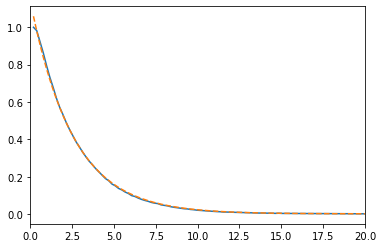

In [62]:
plt.plot(xv,yv) 
plt.plot(xv, monoExp(xv, m, t, b), '--', label="fitted") 
plt.xlim(0,20)
np.argmax(LTobs.iloc[0]['spec'][:,1])

2.5277739622199347


2.5277739622199347

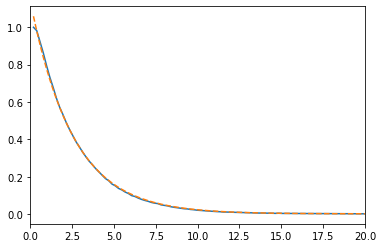

In [63]:
monoexp_dec(LTobs.iloc[0]['spec'])

In [64]:
LTobs.sort_values('alcohol_concentration')

,alcohol_concentration,CD_amount,typ,file_name,spec,lifetime
2328,0.000000,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwa...,"[[0.0, 40.0], [1.0, 40.0], [2.0, 47.0], [3.0, ...",1.924321
2432,0.000000,100.0,LT405,sel_obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwa...,"[[0.0, 36.0], [1.0, 36.0], [2.0, 45.0], [3.0, ...",1.915314
2357,0.033333,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_100ulethanol_2900ul...,"[[0.0, 62.0], [1.0, 62.0], [2.0, 73.0], [3.0, ...",2.048888
2470,0.033333,100.0,LT405,sel_obs2nm_CD032_0.5_100ul_100ulethanol_2900ul...,"[[0.0, 104.0], [1.0, 104.0], [2.0, 117.0], [3....",2.147402
2446,0.066667,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_200ulethanol_2800ul...,"[[0.0, 71.0], [1.0, 71.0], [2.0, 68.0], [3.0, ...",2.162210
...,...,...,...,...,...,...
2419,0.900000,100.0,LT405,sel_obs2nm_CD032_0.5_100ul_2700ulethanol_300ul...,"[[0.0, 62.0], [1.0, 62.0], [2.0, 73.0], [3.0, ...",3.874630
2348,0.933333,100.0,LT405,sel_obs2nm_CD032_0.5_100ul_2800ulethanol_200ul...,"[[0.0, 59.0], [1.0, 59.0], [2.0, 66.0], [3.0, ...",3.461401
2452,0.933333,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_2800ulethanol_200ul...,"[[0.0, 52.0], [1.0, 52.0], [2.0, 68.0], [3.0, ...",3.451192
2381,1.000000,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_3000ulethanol_0ulwa...,"[[0.0, 62.0], [1.0, 62.0], [2.0, 77.0], [3.0, ...",4.121252


In [65]:
def plot_lt(ind):
  argmax=np.argmax(LTobs.iloc[ind]['spec'][:,1])
  xv=np.asarray((LTobs.iloc[ind]['spec'][argmax:,0]-LTobs.iloc[ind]['spec'][argmax-1,0])/1023*200, dtype=np.longdouble)
  yv=np.asarray(LTobs.iloc[ind]['spec'][argmax:,1]/65535, dtype=np.longdouble)
  p0=(1,3,0.002)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0)
  m, t, b = params
  plt.plot(xv,yv) 
  plt.plot(xv, monoExp(xv, m, t, b), '--', label="fitted") 
  plt.xlim(0,20)
  # plt.savefig("png/LT_fit"+str(ind)+".png")
  plt.close()

In [65]:
for i in range(len(LTobs)):
  plot_lt(i)

In [66]:
LTobs.query('typ.str.contains("LT450").values')

,alcohol_concentration,CD_amount,typ,file_name,spec,lifetime
1577,0.266667,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_800ulethanol_2200ul...,"[[0.0, 66.0], [1.0, 66.0], [2.0, 65.0], [3.0, ...",2.921027
2352,0.400000,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_1200ulethanol_1800u...,"[[0.0, 51.0], [1.0, 51.0], [2.0, 62.0], [3.0, ...",3.268166
2357,0.033333,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_100ulethanol_2900ul...,"[[0.0, 62.0], [1.0, 62.0], [2.0, 73.0], [3.0, ...",2.048888
2446,0.066667,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_200ulethanol_2800ul...,"[[0.0, 71.0], [1.0, 71.0], [2.0, 68.0], [3.0, ...",2.162210
2384,0.366667,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_1100ulethanol_1900u...,"[[0.0, 70.0], [1.0, 70.0], [2.0, 79.0], [3.0, ...",3.208882
1530,0.500000,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_1500ulethanol_1500u...,"[[0.0, 75.0], [1.0, 75.0], [2.0, 68.0], [3.0, ...",3.426969
2353,0.666667,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_2000ulethanol_1000u...,"[[0.0, 74.0], [1.0, 74.0], [2.0, 66.0], [3.0, ...",3.719135
2439,0.800000,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_2400ulethanol_600ul...,"[[0.0, 88.0], [1.0, 88.0], [2.0, 99.0], [3.0, ...",3.854824
2407,0.866667,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_2600ulethanol_400ul...,"[[0.0, 59.0], [1.0, 59.0], [2.0, 64.0], [3.0, ...",3.837790
2467,0.333333,100.0,LT450,sel_obs2nm_CD032_0.5_100ul_1000ulethanol_2000u...,"[[0.0, 75.0], [1.0, 75.0], [2.0, 79.0], [3.0, ...",3.139949


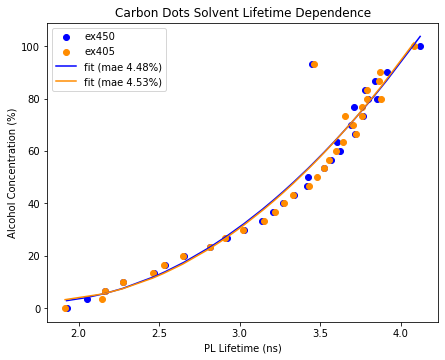

In [68]:
plt.close()
plt.figure(figsize=(7,5.5))
plt.tight_layout()
x450=LTobs.query('typ.str.contains("LT450").values').sort_values('lifetime')['lifetime']
y450=LTobs.query('typ.str.contains("LT450").values').sort_values('lifetime')['alcohol_concentration']*100
x405=LTobs.query('typ.str.contains("LT405").values').sort_values('lifetime')['lifetime']
y405=LTobs.query('typ.str.contains("LT405").values').sort_values('lifetime')['alcohol_concentration']*100
a450,m450, b450 = np.polyfit(x450,y450,2)
a405,m405, b405 = np.polyfit(x405,y405,2)
plt.scatter(x450,y450,color='blue',label='ex450')
plt.scatter(x405,y405,color='darkorange',label='ex405')
yfit450=np.array(a450*np.square(x450)+m450*x450+b450)
yfit405=np.array(a405*np.square(x405)+m405*x405+b405)
plt.plot(x450, yfit450,color='blue',label='fit (mae 4.48%)')
plt.plot(x405, yfit405,color='darkorange',label='fit (mae 4.53%)')
plt.xlabel('PL Lifetime (ns)')
plt.ylabel('Alcohol Concentration (%)')
plt.title('Carbon Dots Solvent Lifetime Dependence')
plt.legend()
plt.savefig("LT_dependence_fit_2.png",dpi=300,facecolor='w')

4.529124732844556
4.480208292782584


/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_13717/3411780425.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1450, p2450], [p1450, p2450], 'b-',color='blue')
/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_13717/3411780425.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1405, p2405], [p1405, p2405], 'b-',color='darkorange')


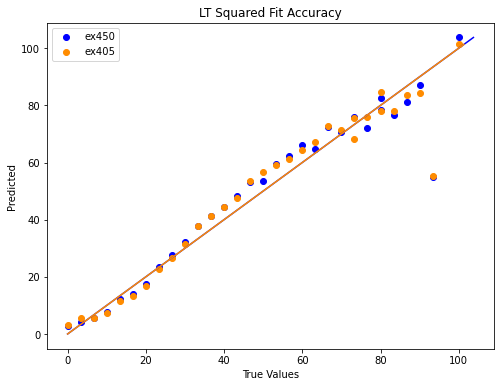

In [42]:
m, b = np.polyfit(PL100obs['max_ind'],PL100obs['alcohol_concentration']*100,1)
plt.figure(figsize=(8,6))
plt.scatter(y450,yfit450,label='ex450',color='blue')
plt.scatter(y405,yfit405,label='ex405',color='darkorange')
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1450 = max(max(yfit450), max(y450))
p2450 = min(min(yfit450), min(y450))
plt.plot([p1450, p2450], [p1450, p2450], 'b-',color='blue')
p1405 = max(max(yfit405), max(y405))
p2405 = min(min(yfit405), min(y405))
plt.plot([p1405, p2405], [p1405, p2405], 'b-',color='darkorange')

print(np.average(np.abs(np.abs(yfit405)-np.abs(y405))))
print(np.average(np.abs(np.abs(yfit450)-np.abs(y450))))
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('LT Squared Fit Accuracy')
plt.legend()
# plt.savefig("LT_squared_fit_accuracy.png")

In [82]:
LTobs.loc[2328]['spec']
LTobs.loc[2381]['spec'][:,0]/1023*200, LTobs.loc[2381]['spec'][:,1]

(array([0.00000000e+00, 1.95503421e-01, 3.91006843e-01, ...,
        1.99608993e+02, 1.99804497e+02, 2.00000000e+02]),
 array([62., 62., 77., ..., 58., 66., 68.]))

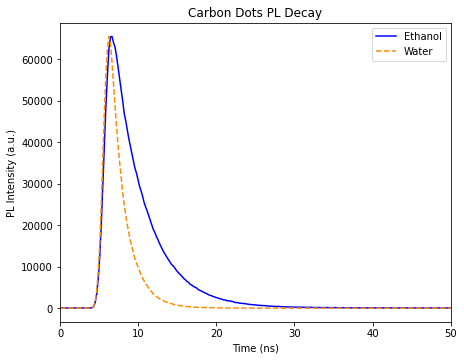

In [97]:
plt.figure(figsize=(7,5.5))
plt.tight_layout()
plt.plot(LTobs.loc[2381]['spec'][:,0]/1023*200, LTobs.loc[2381]['spec'][:,1],'-',color='blue',label='Ethanol')
plt.plot(LTobs.loc[2328]['spec'][:,0]/1023*200, LTobs.loc[2328]['spec'][:,1],'--',color='darkorange',label='Water')
#plt.plot([p1450, p2450], [p1450, p2450], 'b-',color='blue')

#plt.plot([p1405, p2405], [p1405, p2405], 'b-',color='darkorange')

plt.xlim(0,50)
plt.xlabel('Time (ns)')
plt.ylabel('PL Intensity (a.u.)')
plt.title('Carbon Dots PL Decay')
plt.legend()
plt.savefig("water_ethanol.png",dpi=300,facecolor='w')

188.10050470821798


Text(0.5, 1.0, 'PL Linear Fit Accuracy')

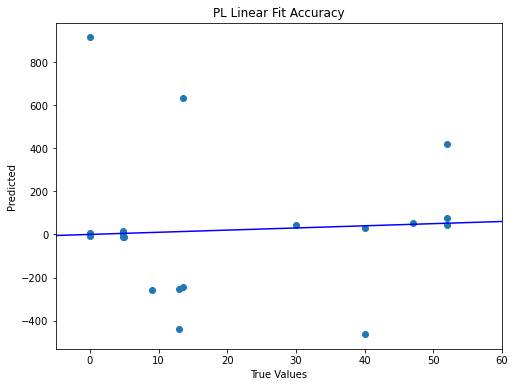

In [43]:
# plt.scatter(PL100obs['alcohol_concentration'],PL100obs['max_ind'])
m, b = np.polyfit(PL100obs['max_ind'],PL100obs['alcohol_concentration']*100,1)
plt.figure(figsize=(8,6))
plt.scatter(bev_feature['alcohol_concentration']*100,m*bev_feature['100_max_ind'] + b)
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1 = max(max(m*bev_feature['100_max_ind'] + b), max(bev_feature['alcohol_concentration']*100))
p2 = min(min(m*bev_feature['100_max_ind'] + b), min(bev_feature['alcohol_concentration']*100))
plt.plot([p1, p2], [p1, p2], 'b-')
print(np.average(np.abs(np.abs(m*bev_feature['100_max_ind'] + b)-np.abs(bev_feature['alcohol_concentration']*100))))
plt.xlim(-5,60)
# plt.ylim(-5,60)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('PL Linear Fit Accuracy')
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
# plt.savefig("PL_linear_fit?_accuracy.png")

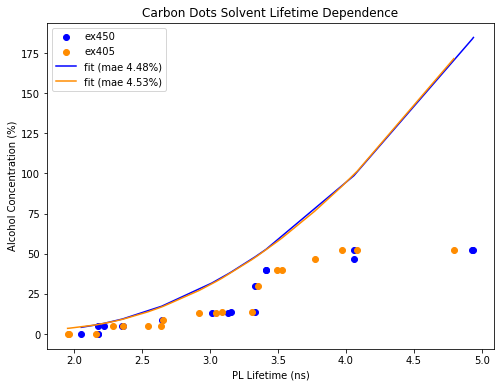

In [46]:
plt.close()
plt.figure(figsize=(8,6))
x450obs=LTobs.query('typ.str.contains("LT450").values').sort_values('lifetime')['lifetime']
y450obs=LTobs.query('typ.str.contains("LT450").values').sort_values('lifetime')['alcohol_concentration']*100
x405obs=LTobs.query('typ.str.contains("LT405").values').sort_values('lifetime')['lifetime']
y405obs=LTobs.query('typ.str.contains("LT405").values').sort_values('lifetime')['alcohol_concentration']*100
x405bev=bev_feature['100_LT405'].sort_values()
y405bev=bev_feature['alcohol_concentration'].sort_values()*100
x450bev=bev_feature['100_LT450'].sort_values()
y450bev=bev_feature['alcohol_concentration'].sort_values()*100
a450,m450, b450 = np.polyfit(x450obs,y450obs,2)
a405,m405, b405 = np.polyfit(x405obs,y405obs,2)
plt.scatter(x450bev,y450bev,color='blue',label='ex450')
plt.scatter(x405bev,y405bev,color='darkorange',label='ex405')
yfit450bev=np.array(a450*np.square(x450bev)+m450*x450bev+b450)
yfit405bev=np.array(a405*np.square(x405bev)+m405*x405bev+b405)
plt.plot(x450bev, yfit450bev,color='blue',label='fit (mae 4.48%)')
plt.plot(x405bev, yfit405bev,color='darkorange',label='fit (mae 4.53%)')
plt.xlabel('PL Lifetime (ns)')
plt.ylabel('Alcohol Concentration (%)')
plt.title('Carbon Dots Solvent Lifetime Dependence')
plt.legend()

22.71070123801698
28.667018925796427


/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_13717/1124476747.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1450, p2450], [p1450, p2450], 'b-',color='blue')
/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_13717/1124476747.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1405, p2405], [p1405, p2405], 'b-',color='darkorange')


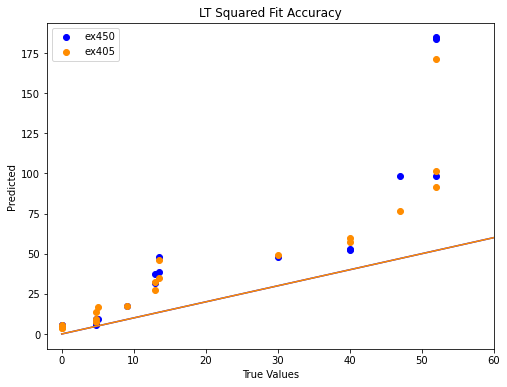

In [45]:
plt.close()
plt.figure(figsize=(8,6))
plt.scatter(y450bev,yfit450bev,label='ex450',color='blue')
plt.scatter(y405bev,yfit405bev,label='ex405',color='darkorange')
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1450 = max(max(yfit450bev), max(y450bev))
p2450 = min(min(yfit450bev), min(y450bev))
plt.plot([p1450, p2450], [p1450, p2450], 'b-',color='blue')
p1405 = max(max(yfit405bev), max(y405bev))
p2405 = min(min(yfit405bev), min(y405bev))
plt.plot([p1405, p2405], [p1405, p2405], 'b-',color='darkorange')

print(np.average(np.abs(yfit405bev)-np.abs(y405bev)))
print(np.average(np.abs(yfit450bev)-np.abs(y450bev)))
plt.xlim(-2,60)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('LT Squared Fit Accuracy')
plt.legend()

In [116]:
beverages

,alcohol_concentration,beverage,blank_LT405spec,blank_LT450spec,blank_PLspec,300_LT405spec,300_LT450spec,300_PLspec,150_LT405spec,150_LT450spec,150_PLspec,100_LT405spec,100_LT450spec,100_PLspec
17,0.300,limoncello,"[[0, 42], [1, 42], [2, 45], [3, 37], [4, 39], ...","[[0, 37], [1, 37], [2, 29], [3, 41], [4, 36], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 7, 0, 22, 0, 0, 11...","[[0, 57], [1, 57], [2, 68], [3, 55], [4, 55], ...","[[0, 52], [1, 52], [2, 60], [3, 66], [4, 75], ...","[[300, 2, 0, 3, 5, 0, 14, 0, 0, 0, 0, 13, 0, 1...","[[0, 61], [1, 61], [2, 70], [3, 72], [4, 68], ...","[[0, 49], [1, 49], [2, 62], [3, 62], [4, 55], ...","[[300, 0, 6, 2, 0, 0, 0, 15, 0, 0, 0, 10, 7, 0...","[[0, 57], [1, 57], [2, 66], [3, 62], [4, 64], ...","[[0, 56], [1, 56], [2, 59], [3, 68], [4, 47], ...","[[300, 0, 7, 10, 0, 1, 14, 2, 0, 12, 0, 0, 7, ..."
0,0.000,bitburgerdrive,"[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0...","[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 75], [1, 75], [2, 83], [3, 97], [4, 77], ...","[[0, 68], [1, 68], [2, 106], [3, 96], [4, 98],...","[[300, 0, 0, 4, 0, 0, 2, 5, 0, 0, 0, 0, 11, 0,...","[[0, 136], [1, 136], [2, 134], [3, 128], [4, 1...","[[0, 75], [1, 75], [2, 73], [3, 69], [4, 75], ...","[[300, 6, 0, 2, 2, 8, 0, 2, 0, 0, 2, 3, 0, 9, ...","[[0, 73], [1, 73], [2, 79], [3, 101], [4, 90],...","[[0, 102], [1, 102], [2, 109], [3, 88], [4, 10...","[[300, 0, 5, 8, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, ..."
6,0.135,whitewine,"[[0, 88], [1, 88], [2, 84], [3, 85], [4, 90], ...","[[0, 92], [1, 91], [2, 82], [3, 77], [4, 87], ...","[[300, 3, 11, 14, 28, 39, 0, 0, 0, 0, 23, 18, ...","[[0, 478], [1, 480], [2, 536], [3, 508], [4, 4...","[[0, 2275], [1, 2274], [2, 2167], [3, 2213], [...","[[300, 0, 0, 0, 0, 0, 4, 3457, 0, 0, 0, 0, 0, ...","[[0, 103], [1, 107], [2, 114], [3, 104], [4, 1...","[[0, 799], [1, 800], [2, 757], [3, 661], [4, 6...","[[300, 13, 0, 12, 2, 1, 13, 10, 0, 5, 1, 1, 3,...","[[0, 63], [1, 62], [2, 59], [3, 55], [4, 58], ...","[[0, 197], [1, 197], [2, 222], [3, 214], [4, 2...","[[300, 8886, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, ..."
11,0.520,luzhoulaojiao,"[[0, 96], [1, 95], [2, 100], [3, 97], [4, 96],...","[[0, 320], [1, 319], [2, 379], [3, 422], [4, 4...","[[300, 42, 44, 41, 58, 103, 126, 108, 111, 92,...","[[0, 156], [1, 156], [2, 163], [3, 137], [4, 1...","[[0, 194], [1, 194], [2, 232], [3, 247], [4, 2...","[[300, 8, 0, 6, 0, 2, 2, 0, 0, 0, 0, 3, 5, 0, ...","[[0, 91], [1, 88], [2, 92], [3, 90], [4, 86], ...","[[0, 100], [1, 101], [2, 100], [3, 96], [4, 11...","[[300, 2, 8, 7, 15, 4, 11, 0, 17, 13, 13, 2, 2...","[[0, 89], [1, 89], [2, 87], [3, 98], [4, 102],...","[[0, 105], [1, 105], [2, 96], [3, 98], [4, 95]...","[[300, 9, 37, 101, 123, 135, 142, 139, 160, 19..."
3,0.130,whitewine2,"[[0, 79], [1, 79], [2, 77], [3, 71], [4, 73], ...","[[0, 66], [1, 66], [2, 66], [3, 56], [4, 69], ...","[[300, 0, 0, 0, 0, 13, 0, 0, 13, 26, 7, 10, 0,...","[[0, 206], [1, 206], [2, 197], [3, 219], [4, 1...","[[0, 968], [1, 968], [2, 988], [3, 921], [4, 1...","[[300, 0, 0, 0, 0, 0, 4, 5, 4, 0, 0, 1, 5, 0, ...","[[0, 66], [1, 66], [2, 71], [3, 67], [4, 68], ...","[[0, 398], [1, 398], [2, 400], [3, 473], [4, 4...","[[300, 13, 10, 0, 5, 3, 5, 5, 5, 0, 0, 1, 3, 7...","[[0, 51], [1, 51], [2, 59], [3, 56], [4, 58], ...","[[0, 133], [1, 133], [2, 127], [3, 130], [4, 1...","[[300, 0, 3, 3, 0, 2, 1, 0, 10, 4, 4, 0, 7, 2,..."
14,0.048,bitburgerpils,"[[0, 87], [1, 87], [2, 83], [3, 85], [4, 86], ...","[[0, 73], [1, 73], [2, 87], [3, 75], [4, 87], ...","[[300, 44, 0, 10, 0, 0, 0, 61, 150, 0, 20, 0, ...","[[0, 125], [1, 125], [2, 137], [3, 142], [4, 1...","[[0, 138], [1, 138], [2, 178], [3, 130], [4, 1...","[[300, 7, 14, 0, 7, 7, 3, 9, 0, 0, 6, 18, 11, ...","[[0, 79], [1, 79], [2, 74], [3, 75], [4, 77], ...","[[0, 84], [1, 84], [2, 90], [3, 91], [4, 101],...","[[300, 9, 3, 0, 0, 0, 0, 7, 5, 7, 0, 4, 1, 0, ...","[[0, 115], [1, 115], [2, 124], [3, 126], [4, 1...","[[0, 102], [1, 102], [2, 113], [3, 102]